In [4]:
import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os


#img = cv2.imread('symptoms/11085_left.jpeg')    #reading an image
img = cv2.imread('nosymptoms/161_left.jpeg')    #reading an image

img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
cv2.imshow('orginal', img_rs)

#ROI
# Select ROI
r = cv2.selectROI(img_rs)
# Crop image
imCrop = img_rs[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
# Display cropped image
cv2.imshow("Image", imCrop)

hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV

clr_rng_img = cv2.inRange(hsv_im,(19,0,200), (255,255,255)) 
cv2.imshow('color range orginal', clr_rng_img);    

#contour drawing test code
image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.drawContours(image, contours, -1, (0,0, 255), 1)

numOfContours = len(contours)   #number of contours

area = []
"""
count = 0
for count in range(numOfContours) :
   # cv2.drawContours(imCrop, contours, -1, (0,0, 255), 1)  #draw contours
    cnt = contours[count]
    area.append(cv2.contourArea(cnt))
    #print(area)
    
    
    count+=1
    #print(contours)

print(numOfContours)    
print(max(area))   #gives the largest area
print(area)
"""
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(imCrop, (x,y), (x+w, y+h), (0,0,255), 1)
    #original = cv2.boundingRect(contour)
    #cv2.rectangle(imCrop, (original[0], original[1]), (original[0]+original[2], original[1] + original[3]), (0,0,255), 1)
    #print(cv2.contourArea(original))
    area.append(w*h)


print(numOfContours)    
print("Area :", area)
maxArea = max(area)
print("max Area = ", maxArea)
area.remove(maxArea)
print(area)
sumOfArea = sum(area)
print(sumOfArea)

cv2.imshow("Bounding box",imCrop)




    
#for getting the file name is a directory
fileNameList = []
image_list = os.listdir("symptoms")
for files in image_list:
    fileName, extension = os.path.splitext(files)
    fileNameList.append(fileName)
    
#writing to a csv file
csvTitle = [['Image Name', 'Count', 'Area']]
csvData = []
csvData.append([fileNameList[0], numOfContours, sumOfArea])

with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)



#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created

69
('Area :', [1, 2, 1, 3, 6, 8, 2, 2, 1, 1, 6, 1, 1, 1, 9, 4, 8, 12, 6, 80, 1, 35, 16, 2, 8, 1, 1, 2, 1, 1, 2, 2, 9, 1, 1, 10, 1, 1, 96, 2, 8, 4, 72, 1, 4, 1, 25, 1, 6, 1, 1, 1, 2, 4, 2, 6, 2, 1, 1763, 9, 6, 1, 1, 1, 6, 9, 1, 24, 66])
('max Area = ', 1763)
[1, 2, 1, 3, 6, 8, 2, 2, 1, 1, 6, 1, 1, 1, 9, 4, 8, 12, 6, 80, 1, 35, 16, 2, 8, 1, 1, 2, 1, 1, 2, 2, 9, 1, 1, 10, 1, 1, 96, 2, 8, 4, 72, 1, 4, 1, 25, 1, 6, 1, 1, 1, 2, 4, 2, 6, 2, 1, 9, 6, 1, 1, 1, 6, 9, 1, 24, 66]
614


In [1]:
import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os


img = cv2.imread('symptoms/1162_left.jpeg')    #reading an image

img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
cv2.imshow('orginal', img_rs)

#ROI
# Select ROI
r = cv2.selectROI(img_rs)
# Crop image
imCrop = img_rs[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
# Display cropped image
cv2.imshow("Image", imCrop)

hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV

clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
cv2.imshow('color range orginal', clr_rng_img);    

#contour drawing test code
image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numOfContours = len(contours)   #number of contours

area = []

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(imCrop, (x,y), (x+w, y+h), (0,0,255), 1)
    area.append(w*h)


print(numOfContours)    
print("Area :", area)
maxArea = max(area)
print("max Area = ", maxArea)
area.remove(maxArea)
print(area)
sumOfArea = sum(area)
print(sumOfArea)

cv2.imshow("Bounding box",imCrop)




    
#for getting the file name is a directory
fileNameList = []
image_list = os.listdir("symptoms")
for files in image_list:
    fileName, extension = os.path.splitext(files)
    fileNameList.append(fileName)
    
#writing to a csv file
csvTitle = [['Image Name', 'Count', 'Area']]
csvData = []
csvData.append([fileNameList[0], numOfContours, sumOfArea])

with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created

1
('Area :', [1])
('max Area = ', 1)
[]
0


In [3]:
#testing manul roi selection
#can be used to check the correctness of contor drawing and everything else from the below code as it has no looping

import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os


#img = cv2.imread('nosymptoms/161_left.jpeg')    #reading an image
img = cv2.imread('symptoms/1162_left.jpeg')    #reading an image


img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
cv2.imshow('orginal', img_rs)


#ROI manual
x = 65
y = 65
w = 300
h = 190
imCrop = img_rs[y:y+h, x:x+w]
cv2.imshow("Image", imCrop)

hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV

clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
cv2.imshow('color range orginal', clr_rng_img);    

#contour drawing test code
image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numOfContours = len(contours)   #number of contours

area = []

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(imCrop, (x,y), (x+w, y+h), (0,0,255), 1)
    area.append(w*h)


print(numOfContours)    
print("Area :", area)
maxArea = max(area)
print("max Area = ", maxArea)
area.remove(maxArea)
print(area)
sumOfArea = sum(area)
print("sum = ",sumOfArea)

cv2.imshow("Bounding box",imCrop)




    
#for getting the file name is a directory
fileNameList = []
image_list = os.listdir("symptoms")
for files in image_list:
    fileName, extension = os.path.splitext(files)
    fileNameList.append(fileName)
    
#writing to a csv file
csvTitle = [['Image Name', 'Count', 'Area']]
csvData = []
csvData.append([fileNameList[0], numOfContours, sumOfArea])

with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created

1
('Area :', [1])
('max Area = ', 1)
[]
('sum = ', 0)


In [10]:
#testing automatic reading of images with particular extensions 
#and writing the data of all images in a dir to a csv file

import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os

path = "symptoms"
ext = [".jpeg", ".jpg", ".png"]

#getting all filenames in a folder
fileNameExtList = []
fileNameOnlyList = []
for file in os.listdir(path):
    if file.endswith(tuple(ext)):
        fileNameExtList.append(file)
        #print(os.path.join(path, file)) #== 'symptoms/11085_left.jpeg'
        fileName, extension = os.path.splitext(file)
        fileNameOnlyList.append(fileName)

#ROI manual specs
x = 65
y = 65
w = 300
h = 190

#writing to a csv file
csvTitle = [['Image Name', 'Count', 'Area']]
csvData = []

for fileName in fileNameExtList:
    img = cv2.imread(os.path.join(path,fileName))    #reading an image
    img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
    #cv2.imshow('orginal', img_rs)
    print(fileName)
    
    imCrop = img_rs[y:y+h, x:x+w]
    #cv2.imshow("Image", imCrop)
    
    hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    #cv2.imshow('color range orginal', clr_rng_img);    
    
    #contour drawing test code
    image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    numOfContours = len(contours)   #number of contours
    print("contours = ",numOfContours)
    area = []

    for contour in contours:
        x1,y1,w1,h1 = cv2.boundingRect(contour)
        cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
        area.append(w1*h1)

    #print(numOfContours)    
    #print("Area :", area)
    try:
        maxArea = max(area)
        print("max area = ", maxArea)
    except:
        maxArea = 0
    #print("max Area = ", maxArea)
    try:
        area.remove(maxArea)
    except:
        maxArea = 0
    #print(area)
    sumOfArea = sum(area)
    print("sum of Area =",sumOfArea)
    #cv2.imshow("Bounding box",imCrop)
    
    csvData.append([fileName, numOfContours, sumOfArea])

with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created

13267_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
11730_right.jpeg
('contours = ', 56)
('max area = ', 775)
('sum of Area =', 1160)
12859_right.jpeg
('contours = ', 8)
('max area = ', 702)
('sum of Area =', 170)
11516_left.jpeg
('contours = ', 18)
('max area = ', 930)
('sum of Area =', 185)
14584_left.jpeg
('contours = ', 35)
('max area = ', 77)
('sum of Area =', 127)
10297_left.jpeg
('contours = ', 4)
('max area = ', 4)
('sum of Area =', 5)
13664_right.jpeg
('contours = ', 11)
('max area = ', 210)
('sum of Area =', 538)
16043_left.jpeg
('contours = ', 8)
('max area = ', 25)
('sum of Area =', 11)
11623_right.jpeg
('contours = ', 4)
('max area = ', 35)
('sum of Area =', 8)
11005_left.jpeg
('contours = ', 46)
('max area = ', 522)
('sum of Area =', 907)
14340_left.jpeg
('contours = ', 201)
('max area = ', 4510)
('sum of Area =', 7022)
11176_right.jpeg
('contours = ', 115)
('max area = ', 437)
('sum of Area =', 323)
16114_right.jpeg
('contours = ', 153)
('max area = ', 43095)
('sum o

1419_left.jpeg
('contours = ', 113)
('max area = ', 27555)
('sum of Area =', 11921)
11980_right.jpeg
('contours = ', 1)
('max area = ', 182)
('sum of Area =', 0)
13161_left.jpeg
('contours = ', 30)
('max area = ', 1288)
('sum of Area =', 763)
14212_right.jpeg
('contours = ', 6)
('max area = ', 195)
('sum of Area =', 59)
12503_left.jpeg
('contours = ', 27)
('max area = ', 816)
('sum of Area =', 1187)
10109_left.jpeg
('contours = ', 2)
('max area = ', 126)
('sum of Area =', 18)
10694_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
11196_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
15149_left.jpeg
('contours = ', 96)
('max area = ', 441)
('sum of Area =', 746)
12676_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
11889_left.jpeg
('contours = ', 102)
('max area = ', 667)
('sum of Area =', 1345)
14522_right.jpeg
('contours = ', 2)
('max area = ', 784)
('sum of Area =', 140)
14811_left.jpeg
('contours = ', 32)
('max area = ', 960)
('sum of Area =', 148)
15897_left.jpeg
('contours = 

11209_right.jpeg
('contours = ', 470)
('max area = ', 1131)
('sum of Area =', 5560)
15493_right.jpeg
('contours = ', 213)
('max area = ', 952)
('sum of Area =', 2920)
10297_right.jpeg
('contours = ', 9)
('max area = ', 6)
('sum of Area =', 19)
10606_right.jpeg
('contours = ', 66)
('max area = ', 264)
('sum of Area =', 742)
12654_right.jpeg
('contours = ', 4)
('max area = ', 1950)
('sum of Area =', 13)
10160_right.jpeg
('contours = ', 24)
('max area = ', 1260)
('sum of Area =', 152)
10384_left.jpeg
('contours = ', 48)
('max area = ', 110)
('sum of Area =', 249)
1592_right.jpeg
('contours = ', 353)
('max area = ', 600)
('sum of Area =', 2380)
15631_right.jpeg
('contours = ', 18)
('max area = ', 814)
('sum of Area =', 189)
14021_right.jpeg
('contours = ', 26)
('max area = ', 15580)
('sum of Area =', 19974)
16043_right.jpeg
('contours = ', 3)
('max area = ', 9)
('sum of Area =', 2)
10489_right.jpeg
('contours = ', 14)
('max area = ', 20)
('sum of Area =', 40)
12831_left.jpeg
('contours = '

10160_left.jpeg
('contours = ', 16)
('max area = ', 1184)
('sum of Area =', 127)
16022_left.jpeg
('contours = ', 9)
('max area = ', 676)
('sum of Area =', 107)
11162_left.jpeg
('contours = ', 2)
('max area = ', 864)
('sum of Area =', 42)
12924_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
14245_right.jpeg
('contours = ', 267)
('max area = ', 1560)
('sum of Area =', 1831)
10920_left.jpeg
('contours = ', 228)
('max area = ', 1020)
('sum of Area =', 1160)
16520_left.jpeg
('contours = ', 14)
('max area = ', 920)
('sum of Area =', 265)
15667_left.jpeg
('contours = ', 109)
('max area = ', 180)
('sum of Area =', 1109)
10688_right.jpeg
('contours = ', 3)
('max area = ', 374)
('sum of Area =', 11)
10438_right.jpeg
('contours = ', 224)
('max area = ', 31243)
('sum of Area =', 9034)
12101_left.jpeg
('contours = ', 22)
('max area = ', 928)
('sum of Area =', 486)
12149_right.jpeg
('contours = ', 0)
('sum of Area =', 0)
15138_left.jpeg
('contours = ', 7)
('max area = ', 56)
('sum of Area =', 55)

11623_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
15835_right.jpeg
('contours = ', 28)
('max area = ', 805)
('sum of Area =', 912)
12805_right.jpeg
('contours = ', 14)
('max area = ', 837)
('sum of Area =', 101)
14936_left.jpeg
('contours = ', 79)
('max area = ', 224)
('sum of Area =', 778)
10230_right.jpeg
('contours = ', 3)
('max area = ', 1)
('sum of Area =', 2)
10112_left.jpeg
('contours = ', 5)
('max area = ', 9)
('sum of Area =', 4)
15868_left.jpeg
('contours = ', 20)
('max area = ', 506)
('sum of Area =', 863)
10131_left.jpeg
('contours = ', 3)
('max area = ', 49)
('sum of Area =', 2)
15151_left.jpeg
('contours = ', 27)
('max area = ', 30)
('sum of Area =', 68)
10153_right.jpeg
('contours = ', 0)
('sum of Area =', 0)
1107_right.jpeg
('contours = ', 177)
('max area = ', 120)
('sum of Area =', 749)
15578_right.jpeg
('contours = ', 10)
('max area = ', 378)
('sum of Area =', 14)
13333_right.jpeg
('contours = ', 17)
('max area = ', 28)
('sum of Area =', 53)
16600_right.jpeg
('c

12227_right.jpeg
('contours = ', 0)
('sum of Area =', 0)
16009_left.jpeg
('contours = ', 13)
('max area = ', 49400)
('sum of Area =', 27)
11590_left.jpeg
('contours = ', 49)
('max area = ', 182)
('sum of Area =', 679)
12590_right.jpeg
('contours = ', 52)
('max area = ', 9120)
('sum of Area =', 923)
1032_right.jpeg
('contours = ', 5)
('max area = ', 72)
('sum of Area =', 9)
16025_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
1178_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
14045_left.jpeg
('contours = ', 193)
('max area = ', 2805)
('sum of Area =', 10354)
1107_left.jpeg
('contours = ', 145)
('max area = ', 135)
('sum of Area =', 719)
11649_right.jpeg
('contours = ', 0)
('sum of Area =', 0)
16524_left.jpeg
('contours = ', 28)
('max area = ', 616)
('sum of Area =', 176)
13002_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
14992_left.jpeg
('contours = ', 60)
('max area = ', 2345)
('sum of Area =', 1968)
11163_right.jpeg
('contours = ', 7)
('max area = ', 418)
('sum of Area =',

In [3]:
#testing for doing double thresholding for removing images with no symptoms
#testing automatic reading of images with particular extensions 
#and writing the data of all images in a dir to a csv file


import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os

path = "symptoms"
ext = [".jpeg", ".jpg", ".png"]

#getting all filenames in a folder
fileNameExtList = []
fileNameOnlyList = []
for file in os.listdir(path):
    if file.endswith(tuple(ext)):
        fileNameExtList.append(file)
        #print(os.path.join(path, file)) #== 'symptoms/11085_left.jpeg'
        fileName, extension = os.path.splitext(file)
        fileNameOnlyList.append(fileName)

#ROI manual specs
x = 65
y = 65
w = 300
h = 190

#writing to a csv file
csvTitle = [['Image Name', 'Count', 'Area']]
csvData = []

contourThreshold = 5

for fileName in fileNameExtList:
    img = cv2.imread(os.path.join(path,fileName))    #reading an image
    img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
    #cv2.imshow('orginal', img_rs)
    print(fileName)
    
    imCrop = img_rs[y:y+h, x:x+w]
    #cv2.imshow("Image", imCrop)
    
    hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    clr_rng_img = cv2.inRange(hsv_im,(19,0,250), (255,255,255)) 
    #cv2.imshow('color range orginal', clr_rng_img);    
    
    #contour drawing test code
    image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    numOfContours1 = len(contours)   #number of contours
    
    if numOfContours1 > contourThreshold:
        #19,0, 111
        clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    
        #contour drawing test code
        image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        numOfContours = len(contours)   #number of contours
    
    
        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)
        #cv2.imshow("Bounding box",imCrop)

        csvData.append([fileName, numOfContours, sumOfArea])
   
    else:

        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        
        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)

        csvData.append([fileName, numOfContours, sumOfArea])
        
        
with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created

13267_left.jpeg


NameError: name 'numOfContours' is not defined

In [1]:
#MAIN TEST FILE
#Above file for creating a training model

import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os

path = "symptoms"
ext = [".jpeg", ".jpg", ".png"]
numOfContours=0

#getting all filenames in a folder
fileNameExtList = []
fileNameOnlyList = []
for file in os.listdir(path):
    if file.endswith(tuple(ext)):
        fileNameExtList.append(file)
        #print(os.path.join(path, file)) #== 'symptoms/11085_left.jpeg'
        fileName, extension = os.path.splitext(file)
        fileNameOnlyList.append(fileName)

#ROI manual specs
x = 65
y = 65
w = 300
h = 190

#writing to a csv file
csvTitle = [['image_name', 'count', 'area']]
csvData = []

contourThreshold = 5

for fileName in fileNameExtList:
    img = cv2.imread(os.path.join(path,fileName))    #reading an image
    img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
    #cv2.imshow('orginal', img_rs)
    print(fileName)
    
    imCrop = img_rs[y:y+h, x:x+w]
    #cv2.imshow("Image", imCrop)
    
    hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    clr_rng_img = cv2.inRange(hsv_im,(19,0,250), (255,255,255)) 
    #cv2.imshow('color range orginal', clr_rng_img);    
    
    #contour drawing test code
    image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    numOfContours1 = len(contours)   #number of contours
    
    if numOfContours1 > contourThreshold:
        #19,0, 111
        clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    
        #contour drawing test code
        image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        numOfContours = len(contours)   #number of contours
    
    
        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)
        #cv2.imshow("Bounding box",imCrop)

        csvData.append([fileName, numOfContours, sumOfArea])
   
    else:

        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        
        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)

        csvData.append([fileName, numOfContours, sumOfArea])
        
        
with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created
    
    
    
    
    
    


1098_left.jpeg
('contours = ', 0)
('max area = ', 1)
('sum of Area =', 1)
14029_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
15023_right.jpeg
('contours = ', 47)
('max area = ', 5460)
('sum of Area =', 924)
12990_right.jpeg
('contours = ', 47)
('sum of Area =', 0)
14981_left.jpeg
('contours = ', 47)
('sum of Area =', 0)
16585_right.jpeg
('contours = ', 47)
('sum of Area =', 0)
12014_left.jpeg
('contours = ', 56)
('max area = ', 3840)
('sum of Area =', 6960)
11176_left.jpeg
('contours = ', 56)
('max area = ', 425)
('sum of Area =', 25)
13333_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
13341_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
11847_right.jpeg
('contours = ', 56)
('max area = ', 1)
('sum of Area =', 0)
12575_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
13811_right.jpeg
('contours = ', 56)
('sum of Area =', 0)
15576_right.jpeg
('contours = ', 56)
('max area = ', 228)
('sum of Area =', 83)
13567_left.jpeg
('contours = ', 56)
('max area = ', 130)
('sum of

11980_left.jpeg
('contours = ', 26)
('sum of Area =', 0)
15481_right.jpeg
('contours = ', 26)
('max area = ', 1)
('sum of Area =', 3)
12831_right.jpeg
('contours = ', 26)
('max area = ', 744)
('sum of Area =', 0)
11085_right.jpeg
('contours = ', 102)
('max area = ', 2744)
('sum of Area =', 2312)
13786_left.jpeg
('contours = ', 102)
('sum of Area =', 0)
14029_right.jpeg
('contours = ', 102)
('max area = ', 2)
('sum of Area =', 0)
1290_right.jpeg
('contours = ', 102)
('max area = ', 357)
('sum of Area =', 0)
11889_left.jpeg
('contours = ', 102)
('max area = ', 667)
('sum of Area =', 1345)
11125_right.jpeg
('contours = ', 102)
('sum of Area =', 0)
10234_left.jpeg
('contours = ', 102)
('max area = ', 378)
('sum of Area =', 2)
13934_right.jpeg
('contours = ', 102)
('max area = ', 10)
('sum of Area =', 4)
14684_right.jpeg
('contours = ', 102)
('sum of Area =', 0)
13002_left.jpeg
('contours = ', 102)
('sum of Area =', 0)
10112_left.jpeg
('contours = ', 102)
('sum of Area =', 0)
12311_left.jpe

15038_right.jpeg
('contours = ', 63)
('sum of Area =', 0)
11980_right.jpeg
('contours = ', 63)
('max area = ', 156)
('sum of Area =', 1)
11408_left.jpeg
('contours = ', 63)
('sum of Area =', 0)
14927_left.jpeg
('contours = ', 3)
('max area = ', 399)
('sum of Area =', 2)
13012_left.jpeg
('contours = ', 3)
('max area = ', 1365)
('sum of Area =', 9)
15476_right.jpeg
('contours = ', 3)
('max area = ', 216)
('sum of Area =', 0)
12805_right.jpeg
('contours = ', 14)
('max area = ', 837)
('sum of Area =', 101)
15481_left.jpeg
('contours = ', 14)
('sum of Area =', 0)
14021_right.jpeg
('contours = ', 14)
('sum of Area =', 0)
11724_right.jpeg
('contours = ', 14)
('max area = ', 96)
('sum of Area =', 0)
13638_right.jpeg
('contours = ', 3)
('max area = ', 240)
('sum of Area =', 243)
15897_left.jpeg
('contours = ', 3)
('sum of Area =', 0)
13643_left.jpeg
('contours = ', 3)
('sum of Area =', 0)
15954_left.jpeg
('contours = ', 3)
('sum of Area =', 0)
11057_left.jpeg
('contours = ', 3)
('max area = ', 

1540_right.jpeg
('contours = ', 107)
('sum of Area =', 0)
1536_right.jpeg
('contours = ', 29)
('max area = ', 1350)
('sum of Area =', 577)
10454_right.jpeg
('contours = ', 29)
('sum of Area =', 0)
12101_right.jpeg
('contours = ', 29)
('sum of Area =', 0)
13664_right.jpeg
('contours = ', 29)
('sum of Area =', 0)
13627_right.jpeg
('contours = ', 29)
('sum of Area =', 0)
15095_left.jpeg
('contours = ', 29)
('max area = ', 121)
('sum of Area =', 25)
16609_right.jpeg
('contours = ', 29)
('max area = ', 546)
('sum of Area =', 0)
13305_right.jpeg
('contours = ', 29)
('max area = ', 156)
('sum of Area =', 48)
14377_left.jpeg
('contours = ', 29)
('max area = ', 4)
('sum of Area =', 3)
12268_left.jpeg
('contours = ', 29)
('max area = ', 899)
('sum of Area =', 14)
1496_right.jpeg
('contours = ', 29)
('sum of Area =', 0)
13780_left.jpeg
('contours = ', 29)
('max area = ', 4875)
('sum of Area =', 526)
15690_left.jpeg
('contours = ', 29)
('sum of Area =', 0)
1541_left.jpeg
('contours = ', 29)
('max 

14936_right.jpeg
('contours = ', 54)
('max area = ', 1)
('sum of Area =', 1)
10131_left.jpeg
('contours = ', 54)
('sum of Area =', 0)
16327_right.jpeg
('contours = ', 54)
('max area = ', 6)
('sum of Area =', 0)
14892_right.jpeg
('contours = ', 54)
('max area = ', 3)
('sum of Area =', 4)
15257_right.jpeg
('contours = ', 54)
('max area = ', 285)
('sum of Area =', 1)
13229_left.jpeg
('contours = ', 7)
('max area = ', 9)
('sum of Area =', 15)
10551_right.jpeg
('contours = ', 7)
('sum of Area =', 0)
15154_right.jpeg
('contours = ', 7)
('sum of Area =', 0)
12798_right.jpeg
('contours = ', 7)
('sum of Area =', 0)
1050_right.jpeg
('contours = ', 438)
('max area = ', 3552)
('sum of Area =', 15370)
163_right.jpeg
('contours = ', 438)
('sum of Area =', 0)
11035_right.jpeg
('contours = ', 74)
('max area = ', 525)
('sum of Area =', 170)
13999_right.jpeg
('contours = ', 74)
('sum of Area =', 0)
15954_right.jpeg
('contours = ', 74)
('sum of Area =', 0)
12111_right.jpeg
('contours = ', 74)
('max area 

Training set has 476 samples.
Testing set has 119 samples.


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

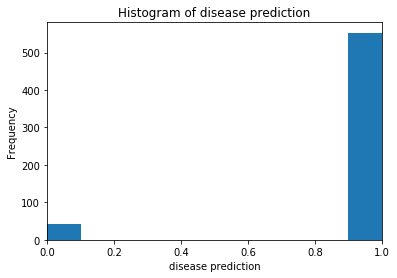

In [8]:
#TEST00

#training the above code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


data=pd.read_csv("dr_features.csv")
data_new=pd.read_csv("dr_features.csv")

predictions=data_new['count']
data_new

data_new['pred_value'] = predictions.apply(lambda x: 1 if x > 0 else 0)



features_raw = data_new[[ "count", "area"]]
from sklearn.model_selection import train_test_split

predict_class = predictions.apply(lambda x: 1 if x > 5 else 0)
"""
with open('dr_features.csv','r') as csvinput:
    with open('dr_features.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)

        all = []
        row = next(reader)
        row.append('pred_values')
        print(row)
        all.append(row)

        for row in reader:
            row.append(a for i in predict_class)
            all.append(row)

        writer.writerows(all)
        
        
#    with open('dr_features.csv', 'w') as csvFile:
#        writer = csv.writer(csvFile)
#        writer.writerows(csvTitle)
#        writer.writerows(csvData)
"""


plt.hist(predict_class, bins=10)
plt.xlim(0,1)
plt.title('Histogram of disease prediction')
plt.xlabel('disease prediction')
plt.ylabel('Frequency')


np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(features_raw, predict_class, train_size=0.80, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


import sklearn
from sklearn import svm

C = 1.0
# Create SVM classification object 
#svc = svm.SVC(kernel='linear',C=C,gamma=2)
svc = svm.SVC(kernel='linear',C=C,gamma=2)

svc.fit(X_train, y_train)


from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
predictions_test

Training set has 476 samples.
Testing set has 119 samples.


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

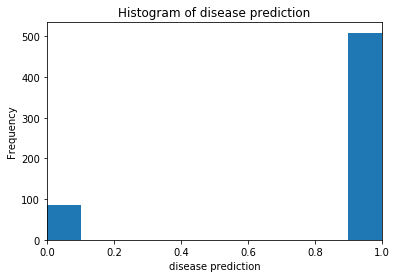

In [7]:
#TEST 01
#trying to write to csv file
#training the above code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


data=pd.read_csv("dr_features.csv")
data_new=pd.read_csv("dr_features.csv")

predictions=data_new['count']
data_new

data_new['pred_value'] = predictions.apply(lambda x: 1 if x > 10 else 0 ,)



features_raw = data_new[[ "count", "area"]]
from sklearn.model_selection import train_test_split

predict_class = predictions.apply( lambda x: 1 if x > 10 else 0 )
"""
with open('dr_features.csv','r') as csvinput:
    with open('dr_features.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)

        all = []
        row = next(reader)
        row.append('pred_values')
        print(row)
        all.append(row)

        for row in reader:
            row.append(a for i in predict_class)
            all.append(row)

        writer.writerows(all)
        
        
#    with open('dr_features.csv', 'w') as csvFile:
#        writer = csv.writer(csvFile)
#        writer.writerows(csvTitle)
#        writer.writerows(csvData)
"""


plt.hist(predict_class, bins=10)
plt.xlim(0,1)
plt.title('Histogram of disease prediction')
plt.xlabel('disease prediction')
plt.ylabel('Frequency')


np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(features_raw, predict_class, train_size=0.80, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


import sklearn
from sklearn import svm

C = 1.0
# Create SVM classification object 
#svc = svm.SVC(kernel='linear',C=C,gamma=2)
svc = svm.SVC(kernel='linear',C=C,gamma=2)

svc.fit(X_train, y_train)


from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
predictions_test